## identify a repeat unit

In [1]:
import pgr
import networkx as nx
import os
import numpy as np
from collections import Counter 
#%matplotlib inline
import matplotlib.pyplot as plt

from bokeh.io import curdoc, show, output_notebook
from bokeh.models import Circle, ColumnDataSource, Grid, LinearAxis, Plot
from bokeh.plotting import figure
from bokeh.models import CrosshairTool
output_notebook()

Loading BokehJS ...

code for getting hg19 repeat unit from "A comprehensive map of single-base polymorphisms in the hypervariable LPA kringle IV type 2 copy number variation region"
```
hg19chr6db = pgr.SeqDB("./hg19_chr6.fa")
hg19chr6db.load_sequences()
print(161038888 - 161033785)
s = hg19chr6db.get_subseq_by_name("chr6", 161033785, 161038888)
f=open("repeat_unit_KIV.fa","w")
print(">hg19_chr6_{}_{}_rc".format(161033785, 161038888), file=f)
#print(">unit_padding_64bp", file=f)
print(pgr.rc(s.upper()), file=f)
f.close()
```

In [2]:
refdb = pgr.SeqDB("/wd/GRCh38_LPA_CHR6_160511483_160684259.fa")
refdb.load_sequences()
refdb.build_shmmrs_parallel(80, 56, 6)
ref_s = refdb.get_seq_by_id(0)

sdb0 = pgr.SeqDB("/wd/LPA_HGRP_v2_seq.fa")
#sdb0 = pgr.SeqDB("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/HPRC/LPA_fa/LPA_HPRC_liftoff_all.fa")

sdb0.load_sequences()
sdb0.build_shmmrs_parallel(80, 56, 6)
    
shmap = pgr.generate_shmmr_map(refdb, sdb0, 128)

mq=pgr.map_interval_query(shmap, 0, 0, len(ref_s))
chains=pgr.find_match_chain(mq, 128)
chain_groups = {}

for c in chains:
    sid0, sid1, chain_label = c[0], c[3], c[7]
    k = sid0, sid1, chain_label
    chain_groups.setdefault(k, [])
    chain_groups[k].append(c)
    all_chains = {}
    
for k, chain in chain_groups.items():

    if len(chain) < 15:
        continue

    rid = chain[0][0]
    rs = chain[0][1]
    re = chain[-1][2]
    # print("X", "R", rs, re)
    tid = chain[0][3]
    ts = chain[0][4]
    te = chain[-1][5]
    # print("X", "T", ts, te)

    if rs > re:
        rs, re = re, rs
        
    if ts > te :
        ts, te = te, ts
        
    all_chains.setdefault(tid, [])
    all_chains[tid].append( (rs, re, tid, ts, te) )

full_length_sids = []
f = open("LPA_HGRP_v2_seq_full_length.fa", "w")
for tid in all_chains:
    all_chains[tid].sort(key=lambda x: x[3])
    max_p = None
    min_p = None
    max_r = None
    min_r = None
 
    for rs, re, tid, ts, te in all_chains[tid]:
       
        if max_p is None or te > max_p:
            max_p = te
     

        if min_p is None or ts < min_p:
            min_p = ts
            
            
        if max_r is None or re > max_r:
            max_r = re

        if min_r is None or rs < min_r:
            min_r = rs
            
    len_p  = max_p - min_p
    if min_r > 20000 or len(ref_s) - max_r > 20000:
        # print(tid, min_r, max_r, min_p, max_p, len_p, )
        continue
        
    full_length_sids.append(tid)
    print(">{}".format(sdb0.get_name_by_id(tid)),file=f)
    print(sdb0.get_seq_by_id(tid),file=f)

    #print(tid, min_r, max_r, min_p, max_p, len_p, )
f.close()

In [3]:
sdb0 = pgr.SeqDB("/wd/LPA_HGRP_v2_seq_full_length.fa")
#sdb0 = pgr.SeqDB("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/HPRC/LPA_fa/LPA_HPRC_liftoff_all.fa")

sdb0.load_sequences()


#s = sdb0.get_seq_by_id(61)
#s = sdb0.get_seq_by_name("HG005#1#CM099986.1:162396742-162619484/rc")

s = sdb0.get_seq_by_name("chm13_chr6:161762988-162032102")
#print(sdb0.get_name_by_id(61))
#s = s[102821-25000:102821+25000]

x, y = pgr.get_shmmr_dots(ref_s, s, 80, 56, 6)

In [4]:
TOOLTIPS = [
  
    ("(x,y)", "($x{10N}, $y{10N})"),

]
p1 = figure(plot_width=480, plot_height=360, tooltips=TOOLTIPS)

p1.add_tools(CrosshairTool())
p1.circle(x, y, size=1)
p1.xaxis.axis_label = "GRCh38"
#p1.xaxis.axis_label = "HG005#1"
p1.yaxis.axis_label = "CHM13 v1.1" 
show(p1)

In [15]:
42674-37124
225738 - 184 
148067 + 161762988, 5544 + 148067  + 161762988

(161911055, 161916599)

In [16]:
161762988+225554, 161762988+225554 - 5543
161762988+ 148067, 161762988+148067 + 5544

(161911055, 161916599)

GTATTGTGGGATTGTGTATTCACATGCAAATGCATCTGTATCTGTCTAGTCTCCGTATCTCTCTCGGTAGGACTTCATATTCTAATGTGGGAGTTGCAACGAACATGTAGTTCTTCAGAAAACACACGTCATCCAGGAGGATAGCCGTTC
GTATTGTGGGATTGTGTATTCACATGCAAATGCATCTGTATCTGTCTAGTCTCCGTATCTCTCTCGGTAGGACTTCATATTCTAATGTGGGAGTTGCAACGAACATGTAGTTCTTCAGAAAACACACGTCATCCAGGAGGATAGCCGTTC

GTATTGTGGGATTGTGTATTCACATGCAAATGCATCTGTATCTGTCTAGTCTCCGTATCTCTCTCGGTAGGACTTCATATTCTAATGTGGGAGTTGCAACGAACATGTAGTTCTTCAGAAAACACACGTCATCCAGGAGGATAGCCGTTCCAGGTCAACCCTCACACTCTATGTACTCAATACGTAGTGAAAAGGCTCTACCTTTCCCACAGAAAAGCATTGTGCAAATAGTATTACTGTCTGTCAGGTTTAGTAGGTTTGTTTCTCCAAGACTTCTCAAAGCTGCCCTGGAAAACTTGCTCCCAGGCAGGATGCAGTATCTCTAGAAGGGGTTCCTAGGCAGGTCCTTCTCTCCTGCTCTCAGTCTACCCTCTGCTGGCCGCAGCTACTCCGGGACTGAGGGTAAGGGGGATGAGTTGAAAGAACAGTGGGACCCATGGCATAAAGGAAGACGGCAGGGTGGACTAAGAGATCTGAAGAGGTCGGACAGCTACGGAGCAGCAGAGAAAAATGCATTAGGGGGCAAAGCAGGCGAGTAGTTTGGGCTGCGGGGATCTTGAAGCATTCGCTCTTCCTTATGCCTCCCAAGAACGTTGCTCCAACCTCCCAGTATCCTCACATTCATGACCTCTGGCTGCCTGAGAAAATGGGAAATGTATTATGGGCCATGGGGTTCCAACACTGTCTCTCTAGAGAC

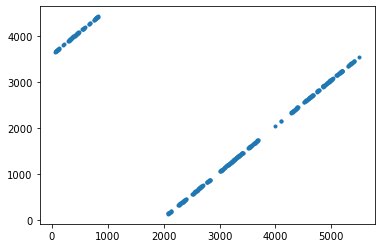

In [5]:
s = sdb0.get_seq_by_name("chm13_chr6:161762988-162032102")

b = 225554 - 5543
e = 225554



#b = 37124  + 1911
#e = 42674  + 1911

print(s[b:b+150])
print(s[e:e+150])
print()

print(s[b:e])
print()
print(s[e-150:e])

d = e-b
print(e-b)

print(s[b:e])
f=open("repeat_unit.fa", "w")
print(">unit0",file=f)
sub_s = pgr.rc(s[b:e]) # align with the transcript orientation
print(sub_s,file=f)



b = 148067
e = 148067 + 5544

#f=open("repeat_unit2.fa", "w")
print(">unit1",file=f)
sub_s = pgr.rc(s[b:e]) # align with the transcript orientation
print(sub_s,file=f)
f.close()



l14005 = pgr.SeqDB("repeat_unit_L14005.fa")
l14005.load_sequences()
sub_s2 = l14005.get_seq_by_id(0)


x, y = pgr.get_shmmr_dots(sub_s, sub_s2, 12, 56, 1)                           
plt.plot(x, y, ".")

In [6]:
sdb0 = pgr.SeqDB("/wd/repeat_unit.fa")
sdb0.load_sequences()
sdb0.build_shmmrs_parallel(1, 56, 1)

#sdb1 = pgr.SeqDB("/wd/LPA_HGRP_v2_seq_full_length.fa")
sdb1 = pgr.SeqDB("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/HPRC/LPA_fa/LPA_HPRC_liftoff_all.fa")
sdb1.load_sequences()
sdb1.build_shmmrs_parallel(1, 56, 1)

In [7]:
shmap = pgr.generate_shmmr_map(sdb0, sdb1, 10240)

In [8]:
%%time
mq = pgr.map_interval_query(shmap, 
                          0, 
                          0, sdb0.get_len_by_id(0))


CPU times: user 40.4 s, sys: 3.1 s, total: 43.5 s
Wall time: 43.6 s


In [10]:
#mq=pgr.find_match_chain(mq,128)

In [9]:

matches = {}
for r in mq:
    key = r[3],r[-1]
    matches.setdefault(key, [])
    matches[key].append(r)

In [10]:
i = 0
lens = []
for k in matches:
    m = matches[k]
    m.sort(key=lambda _:_[4])
    b, e = m[0][4], m[-1][4]
    #print(m[0], m[-1], e-b)
    lens.append( (e-b)/5550)

Text(0, 0.5, 'counts')

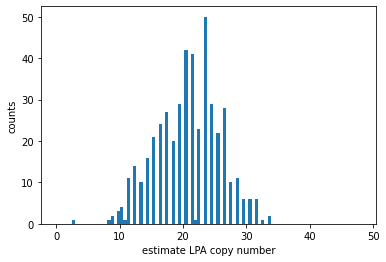

In [11]:
plt.hist(lens, bins=np.linspace(0,48,96))
#plt.hist(lens, bins=np.linspace(0,1,100))
plt.xlabel("estimate LPA copy number")
plt.ylabel("counts")

In [14]:
!pwd

/wd


In [12]:
i = 0
#f = open("LPA_repeat_segments.fa", "w")
f = open("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/work/LPA_repeat_segments.fa", "w")
for k in matches:
   
    m = matches[k]
    m.sort(key=lambda _:_[4])
    print(m[0], m[-1])
    b, e = m[0][4], m[-1][4]
    seq = sdb1.get_subseq_by_id(k[0], b, e)
    reverse =0
    if m[0][-2] == 1:
        seq = pgr.rc(seq)
        reverse=1
    
 
    name = sdb1.get_name_by_id(k[0])
    #print(len(name))
    print(f">{name}_{b}-{e}_{reverse}", file=f)
    print(seq, file=f)
    
f.close()

[0, 4992, 4993, 0, 16966, 16967, 0, 0] [0, 1885, 1886, 0, 81397, 81398, 0, 0]
[0, 4992, 4993, 1, 16929, 16930, 0, 0] [0, 1885, 1886, 1, 125726, 125727, 0, 0]
[0, 4992, 4993, 2, 16998, 16999, 0, 0] [0, 1885, 1886, 2, 81432, 81433, 0, 0]
[0, 4992, 4993, 3, 16971, 16972, 0, 0] [0, 1885, 1886, 3, 81404, 81405, 0, 0]
[0, 4992, 4993, 4, 16883, 16884, 0, 0] [0, 1885, 1886, 4, 103478, 103479, 0, 0]
[0, 4992, 4993, 5, 17062, 17063, 0, 0] [0, 1885, 1886, 5, 87062, 87063, 0, 0]
[0, 4992, 4993, 6, 17147, 17148, 0, 0] [0, 1885, 1886, 6, 153740, 153741, 0, 0]
[0, 4992, 4993, 7, 16968, 16969, 0, 0] [0, 1885, 1886, 7, 153485, 153486, 0, 0]
[0, 4992, 4993, 8, 16968, 16969, 0, 0] [0, 1885, 1886, 8, 175644, 175645, 0, 0]
[0, 4992, 4993, 9, 16991, 16992, 0, 0] [0, 1885, 1886, 9, 192342, 192343, 0, 0]
[0, 4992, 4993, 10, 16968, 16969, 0, 0] [0, 1885, 1886, 10, 136851, 136852, 0, 0]
[0, 4992, 4993, 11, 16976, 16977, 0, 0] [0, 1885, 1886, 11, 114678, 114679, 0, 0]
[0, 4992, 4993, 12, 16929, 16930, 0, 0] [0, 

In [13]:
sdb0 = pgr.SeqDB("/wd/repeat_unit.fa")
sdb0.load_sequences()
sdb0.build_shmmrs_parallel(1, 48, 1)

#sdb1 = pgr.SeqDB("/wd/LPA_repeat_segments.fa")
sdb1 = pgr.SeqDB("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/work/LPA_repeat_segments.fa")

sdb1.load_sequences()
sdb1.build_shmmrs_parallel(1, 48, 1)

In [14]:
s00 = sdb0.get_seq_by_id(0)
print(len(s00))

5543


In [27]:
s00 = sdb0.get_seq_by_id(0)
s1 = sdb1.get_seq_by_name("chm13_chr6:161762988-162032102_95110-231708_1")


l14005 = pgr.SeqDB("repeat_unit_L14005.fa")
l14005.load_sequences()
s01 = l14005.get_seq_by_id(0)

x, y = pgr.get_shmmr_dots(s01, s1, 1, 56, 1)
TOOLTIPS = [
  
    ("(x,y)", "($x{10N}, $y{10N})"),

]
p1 = figure(plot_width=480, plot_height=360, tooltips=TOOLTIPS)

p1.add_tools(CrosshairTool())
p1.circle(x, y, size=1)
p1.xaxis.axis_label = "L14005.1"
p1.yaxis.axis_label = "CHM13 v1.1 LAP repeats" 
show(p1)


x, y = pgr.get_shmmr_dots(s00[64:-64], s1, 1, 56, 1)
TOOLTIPS = [
  
    ("(x,y)", "($x{10N}, $y{10N})"),

]
p2 = figure(plot_width=480, plot_height=360, tooltips=TOOLTIPS)

p2.add_tools(CrosshairTool())
p2.circle(x, y, size=1)
p2.xaxis.axis_label = "Anchored Repeat Unit"
p2.yaxis.axis_label = "CHM13 v1.1 LAP repeats" 
show(p2)

thread '<unnamed>' panicked at 'called `Option::unwrap()` on a `None` value', py/src/lib.rs:202:43


PanicException: called `Option::unwrap()` on a `None` value

In [15]:
shmap = pgr.generate_shmmr_map(sdb0, sdb1, 10240)

In [16]:
%%time
mq=pgr.map_interval_query(shmap, 
                          sdb0.get_id_by_name("unit0"), 
                          0, sdb0.get_len_by_name("unit0"))

CPU times: user 42.6 s, sys: 3.2 s, total: 45.8 s
Wall time: 45.9 s


In [17]:
matches = {}
for r in mq:
    key = r[3],r[-1]
    matches.setdefault(key, [])
    matches[key].append(r)

In [18]:
def grouping_hits(hm):
    groups = []
    tol = 2000
    for h, m in hm:
        new_group = True
        for g in groups:
            if abs(h - g[0]) < tol:
                g[0] = g[0] * len(g[1]) + h
                g[1].append((h,m))
                g[0] /= len(g[1])
                new_group = False
                break
        if new_group:
            groups.append( [h, [(h,m)]])
    return groups
                

In [23]:
f = open("all_LPA_repeats.fa", "w")
f2 = open("all_LPA_repeats_2.fa", "w")
for k in matches:
    #print(k)
    m = matches[k]
    m.sort(key=lambda _:_[4])
    #print(m[0], m[-1])

    ## plotting
    strand = 0
    if m[0][-2] == 1:
        h = [r[4]+r[1] for r in m]
        strand = 1
    else:
        h = [r[4]-r[1] for r in m]
        strand = 0
        
    #print(k, len(m), len(h))
    gs = grouping_hits(zip(h,m))
    #print(len(gs))
    
    for g in gs:
        #print(len(g[1]))
        if len(g[1]) < 10:
            continue
        g[1].sort(key=lambda _:_[1])
        b, e = g[1][0][1][4], g[1][-1][1][4]
        if strand == 1:
            b, e = e, b
        
        if e - b < 5000 or e - b > 6000: ## there is a long form with > 6000 at the end of the repeat array
            print("*", k, b, e, e-b)
            seq = sdb1.get_subseq_by_id(k[0], b, e)
            if strand == 1:
                seq = pgr.rc(seq)
            name = sdb1.get_name_by_id(k[0])
            print(">{}_{}_{}_{}".format(name, b, e, strand), file=f2)
            #print(">{}_{}_{}_{}".format(k[0], b, e, strand), file=f)
            print("{}".format(seq), file=f2)
            m = [_[1] for _ in g[1]]
            """
            if e - b > 1000:
                plt.figure()
                xy = [(m[1], m[4]) for m in m]
                x, y = zip(*xy)
                #plt.figure()
                plt.plot(x, y, ".", markersize = 0.5)
            """
            continue
        else:
            print(" ", k, b, e, e-b)
            seq = sdb1.get_subseq_by_id(k[0], b, e)
            name = sdb1.get_name_by_id(k[0])
            if strand == 1:
                seq = pgr.rc(seq)

            print(">{}_{}_{}_{}".format(name, b, e, strand), file=f)
            print("{}".format(seq), file=f)
        #print(len(g[1]), g[1][0], g[1][-1])
        
        
    
f.close()


* (0, 0) 48 608 560
  (0, 0) 658 6156 5498
  (0, 0) 6206 11699 5493
  (0, 0) 11749 17245 5496
  (0, 0) 17295 22793 5498
  (0, 0) 22843 28351 5508
  (0, 0) 28401 33905 5504
  (0, 0) 33955 39449 5494
  (0, 0) 39499 44993 5494
  (0, 0) 45043 50537 5494
  (0, 0) 50587 56083 5496
  (0, 0) 56133 61623 5490
  (0, 0) 61673 67172 5499
  (0, 0) 67222 72720 5498
  (0, 0) 72770 78267 5497
  (0, 0) 78317 83811 5494
  (0, 0) 83908 89358 5450
  (0, 0) 89408 94910 5502
  (0, 0) 94960 100462 5502
  (0, 0) 100512 106017 5505
  (0, 0) 106114 111572 5458
  (0, 0) 111669 117135 5466
  (0, 0) 117232 122692 5460
  (0, 0) 122789 128239 5450
* (0, 0) 128336 132068 3732
* (0, 0) 134764 135083 319
* (1, 0) 279 555 276
  (1, 0) 605 6062 5457
  (1, 0) 6143 11602 5459
  (1, 0) 11683 17152 5469
  (1, 0) 17233 22700 5467
  (1, 0) 22781 28240 5459
  (1, 0) 28321 33788 5467
  (1, 0) 33869 39338 5469
  (1, 0) 39419 44888 5469
  (1, 0) 44969 50440 5471
  (1, 0) 50521 55992 5471
  (1, 0) 56073 61542 5469
  (1, 0) 61623 67

In [24]:
#!abPOA-v1.2.5/bin/abpoa ./all_LPA_repeats.fa  -O2,1 -k 8 -w 8 -m1 -r2 > LPA_poa_out 

In [25]:
%%bash
./pg_map --out_prefix tmp --target_fasta all_LPA_repeats.fa --ref_fasta repeat_unit.fa -k 24 -m 10240 -r3 -w32

In [26]:
p = []
with open("tmp.0.path") as f:
    for r in f:
        c = int(r.strip().split()[1])
        p.append(c)
        
nodes = list(zip(p[0:-2],p[1:-1]))
node_id = {}
i = 0
for n in nodes:
    node_id[n] = i
    i += 1


backbone_edges = list(zip(nodes[0:-2], nodes[1:-1]))

In [27]:
G = nx.DiGraph()
for n0, n1 in backbone_edges:
    n0 = node_id[n0]
    n1 = node_id[n1]
    G.add_edge(n0, n1)

In [28]:
import math

In [29]:
cx = None
p_rec = None
weight = {}
colors = {}
with open("tmp.aln") as f:
    for r in f:
        r = [int(_) for _ in r.strip().split()]
        if cx == None:
            cx = r[1]
            p_rec = r
            
        if r[1] > cx:
            n0 = (p_rec[1], p_rec[2])
            n1 = (r[1], r[2])
            if n0  in node_id and n1  in node_id:
                n0 = node_id[n0]
                n1 = node_id[n1]
                weight.setdefault((n0, n1),0)
                weight[(n0, n1)] += 1
                colors.setdefault((n0, n1), "black")
                #if r[3] == 1:
                #    colors[(n0, n1)] = "red"
                #G.add_edge(n0, n1)
            cx = r[1]
            p_rec = r
        else:
            cx = r[1]
            p_rec = r
            
for n0, n1 in weight:
    w = weight[(n0,n1)]
    G.add_edge(n0, n1, weight=w, penwidth=math.log(w)*2, color=colors[(n0,n1)])

In [30]:
len(G.nodes()),len(G.edges())

(246, 606)

In [31]:
nx.write_gexf(G, "test_pan_LPA_tmp.gexf")

In [32]:
import networkx.drawing.nx_agraph as nx_agraph

In [33]:
nx_agraph.write_dot(G, "test_pan_LPA_tmp.dot")
!dot  -Tsvg test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=10,2 > out.svg 
!dot  -Tpng test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=10,2 > out.png

In [34]:
from IPython.core.display import SVG, display_png

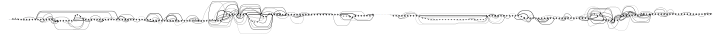

In [35]:
SVG("out.svg")

In [36]:
sdb0 = pgr.SeqDB("/wd/all_LPA_repeats.fa")
sdb0.load_sequences()
#sdb0.build_shmmrs_parallel(32, 24, 3)
sdb0.build_shmmrs_parallel(32, 56, 3)


In [37]:
weight = {}
kmers = set()
for sid in sorted(sdb0.get_all_ids()):
    locs = sdb0.get_shmmer_locs_by_id(sid)
    s = sdb0.get_seq_by_id(sid)
    for i in range(len(locs)-1):
        p1 = locs[i]
        p2 = locs[i+1]
        m1 = s[p1-56:p1]
        m2 = s[p2-56:p2]
        kmers.add(m1)
        kmers.add(m2)
        weight.setdefault((m1, m2),0)
        weight[(m1, m2)]+=1
    
G = nx.DiGraph()
for m1, m2 in weight:
    w = weight[(m1,m2)]
    G.add_edge(m1,m2, weight=w, penwidth=w**0.5*0.75)


In [38]:
len(G.nodes()),len(G.edges())

(910, 1527)

In [39]:
nx.write_gexf(G, "test_pan_LPA_tmp.gexf")

In [40]:
nx_agraph.write_dot(G, "test_pan_LPA_tmp.dot")
!dot  -Tsvg test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=20,10 -Nlabel="*" > out.svg 
!dot  -Tpng test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=20,10 -Nlabel="*" > out.png

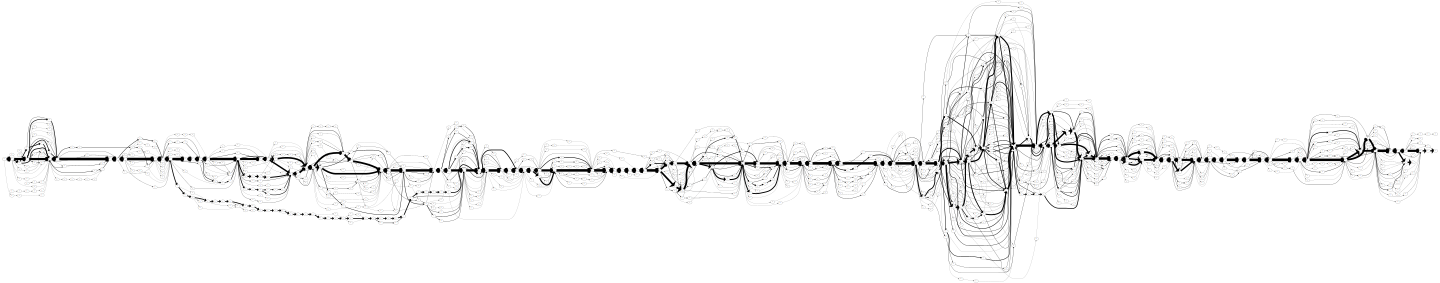

In [41]:
SVG("out.svg")

In [42]:
#-------------------------------------------------

In [43]:
sdb0 = pgr.SeqDB("/wd/all_LPA_repeats.fa")
sdb0.load_sequences()

sdb0.build_shmmrs_parallel(32, 48, 3)
weight = {}
kmers = set()
for sid in sorted(sdb0.get_all_ids()):
    locs = sdb0.get_shmmer_locs_by_id(sid)
    s = sdb0.get_seq_by_id(sid)
    for i in range(len(locs)-1):
        p1 = locs[i]
        p2 = locs[i+1]
        m1 = s[p1-48:p1]
        m2 = s[p2-48:p2]
        kmers.add(m1)
        kmers.add(m2)
        weight.setdefault((m1, m2),0)
        weight[(m1, m2)]+=1

sdb0 = pgr.SeqDB("/wd/all_LPA_repeats_2.fa")
sdb0.load_sequences()

sdb0.build_shmmrs_parallel(32, 48, 3)
        

for sid in sorted(sdb0.get_all_ids()):
    locs = sdb0.get_shmmer_locs_by_id(sid)
    s = sdb0.get_seq_by_id(sid)
    for i in range(len(locs)-1):
        p1 = locs[i]
        p2 = locs[i+1]
        m1 = s[p1-48:p1]
        m2 = s[p2-48:p2]
        kmers.add(m1)
        kmers.add(m2)
        weight.setdefault((m1, m2),0)
        weight[(m1, m2)]+=1
    
kmer_count = {}
with open("kmer_in_graph.txt","w") as f:
    for m in list(kmers):
        print(m, file=f)
        kmer_count[m] = 0

In [44]:
sdb0 = pgr.SeqDB("/wd/all_LPA_repeats.fa")
sdb0.load_sequences()

s = sdb0.get_seq_by_id(102)

import random
rcmap = dict(zip("ACGTN","TGCAN"))
def rc(s):
    return "".join([rcmap[_] for _ in s[::-1]])
print(len(s))
for i in range(0, int(len(s) * 50 / 75)):
    p = random.randint(0,len(s)-75)
    
    r = s[p:p+75]
    for pp in range(48, len(r)):
        mer = r[pp-48:pp]
        if mer in kmer_count:
            kmer_count[mer] += 1
            
        mer = rc(mer)
        if mer in kmer_count:
            kmer_count[mer] += 1

5494


In [45]:


    
G = nx.DiGraph()
for m1, m2 in weight:
    w = weight[(m1,m2)]
    G.add_edge(m1,m2, weight=w, penwidth=w**0.5*0.75)


for mer, c in kmer_count.items():
    G.nodes[mer]["width"] = 1
    G.nodes[mer]["height"] = 1

    if int(c) > 0:
        G.nodes[mer]["fillcolor"] = "red"
        G.nodes[mer]["style"]="filled"
        

In [46]:
len(G.nodes()),len(G.edges())

(974, 1622)

In [47]:
nx_agraph.write_dot(G, "test_pan_LPA_tmp.dot")
!dot  -Tsvg test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=20,10 -Nlabel="*" > out.svg 
!dot  -Tpng test_pan_LPA_tmp.dot -x -Grankdir=LR -Gsize=20,10 -Nlabel="*" > out.png

In [ ]:
SVG("out.svg")